In [1]:
from sklearn.datasets import load_iris
import pandas as pd

#Cargar datos
iris = load_iris()

#Convertir a dataframe
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Exploración de datos

<function matplotlib.pyplot.show(close=None, block=None)>

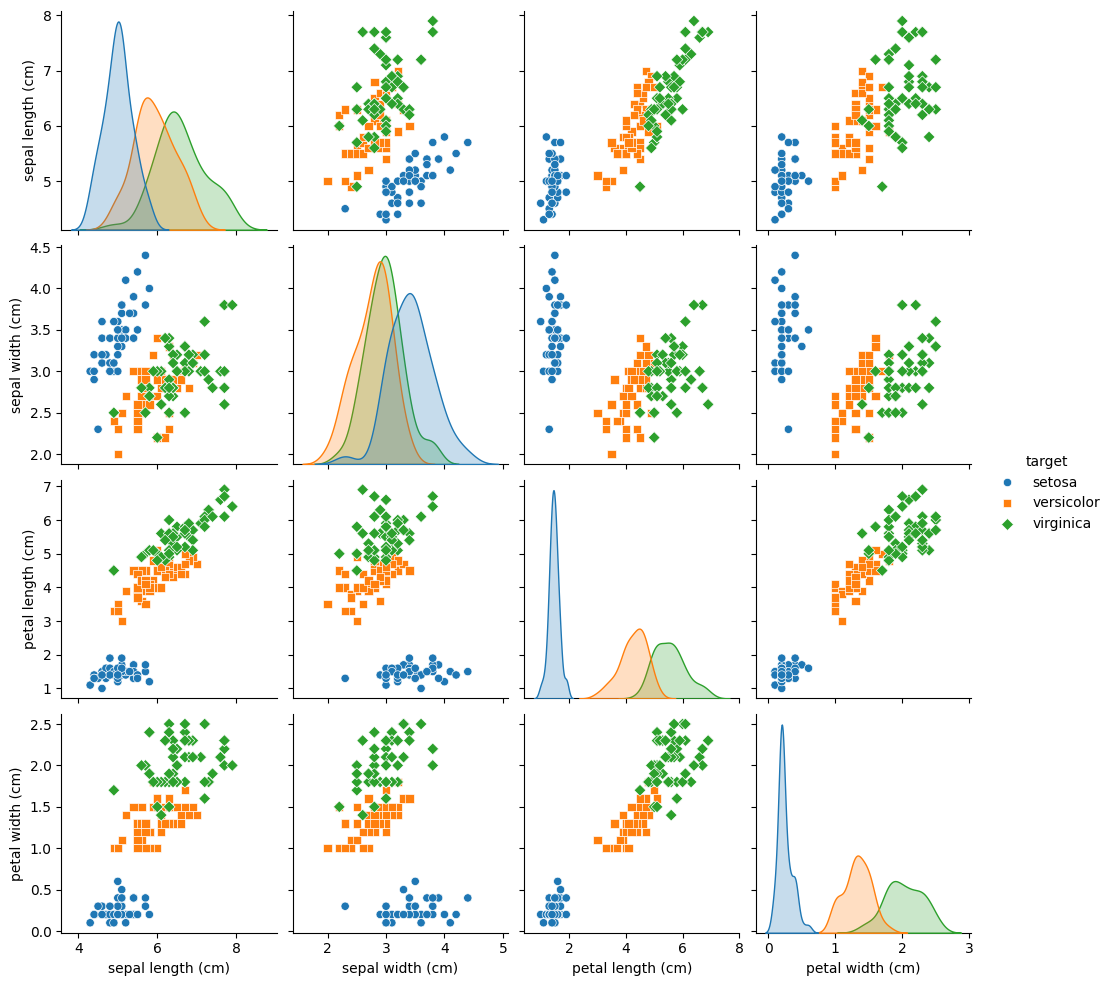

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#Añadir nombres de clases
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#Graficar características
sns.pairplot(df, hue='target', markers=['o','s','D'])
plt.show

# Gráfica de caja

<function matplotlib.pyplot.show(close=None, block=None)>

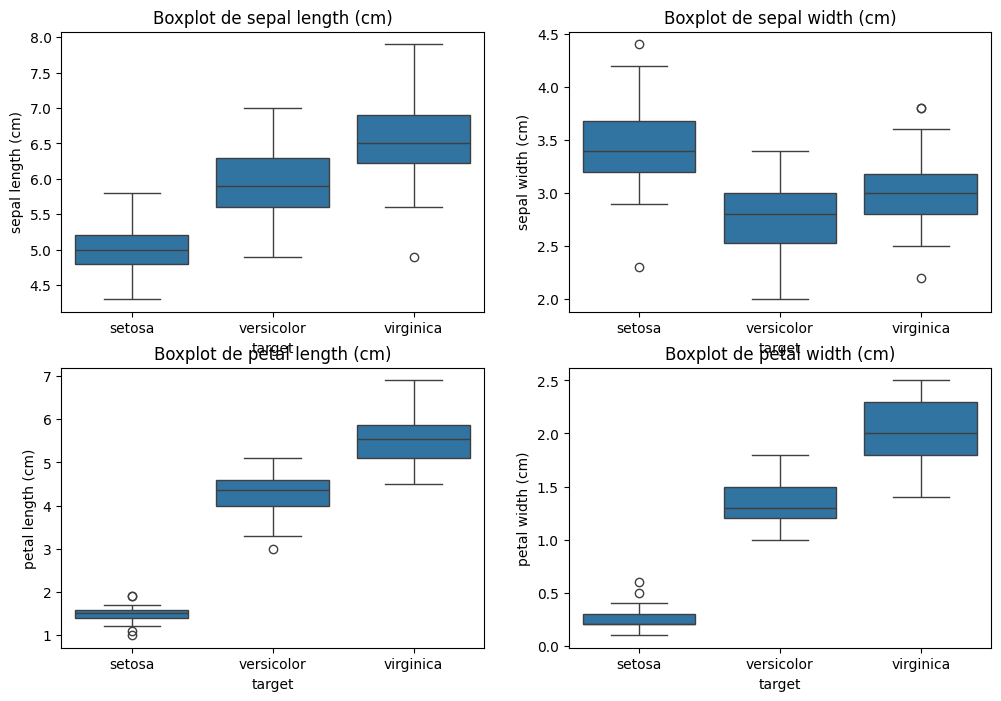

In [3]:
#Configurar el tamaño de la figura
plt.figure(figsize=(12,8))
# Gráfica de caja para cada característica
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=feature, data = df)
    plt.title(f'Boxplot de {feature}')
plt.tight_layout
plt.show
    

# Gráfico de violín

<function matplotlib.pyplot.show(close=None, block=None)>

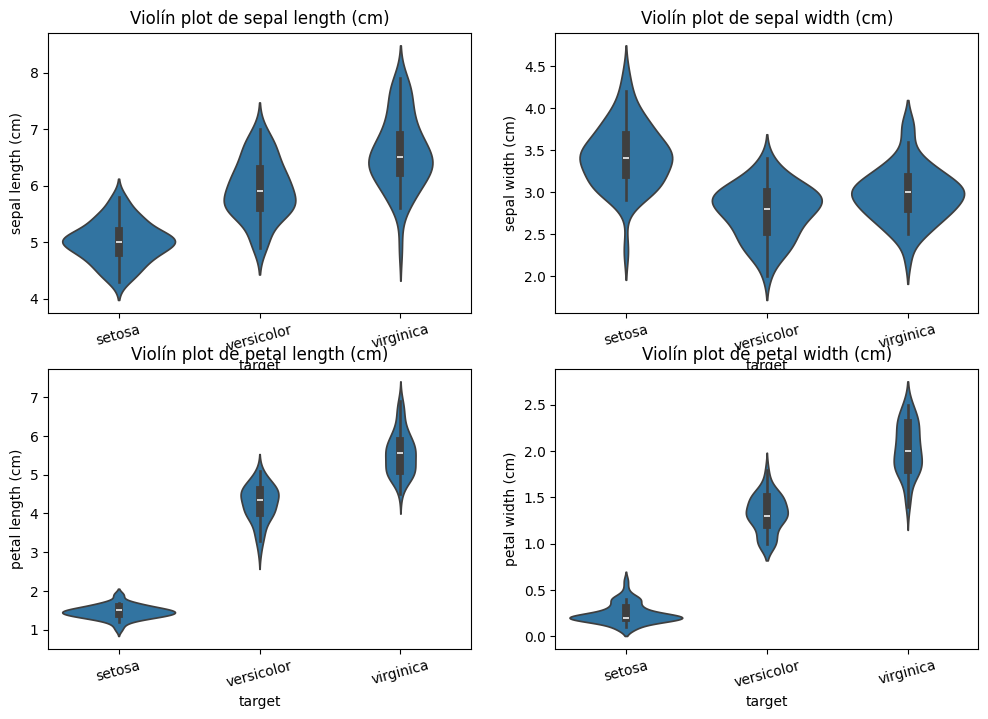

In [4]:
#Configurar el tamaño de la figura
plt.figure(figsize=(12,8))
#Gráfica de violín para cada característica
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='target', y=feature, data = df)
    plt.title(f'Violín plot de {feature}')
    plt.xticks(rotation=15)
plt.tight_layout
plt.show

# Preprocesamiento

In [5]:
#MinMaxSacaler

from sklearn.preprocessing import MinMaxScaler

#Normalizar características
scaler = MinMaxScaler()
df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


# Diseño Red Neuronal

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

#Inicializar el modelo secuencial
model = Sequential()

model.add(Input(shape=(4,)))

#Capa de entrada (4 características de entrada y capa oculta de 8 neuronas)
model.add(Dense(8, activation='relu'))
#Capa oculta con 6 neuronas
model.add(Dense(6, activation='relu'))
#Capa de salida con 3 neuronas
model.add(Dense(3, activation='softmax'))
#Resumen de la arquitectura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#Cargar el conjunto de datos iris
x = iris.data
y = iris.target

#Convertir las etiquetas a codificación categorías
y_categorical = to_categorical(y)

#Dividir el conjunto de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#Entrenar
model.fit(x_train, y_train, epochs=100, batch_size=5, validation_data=(x_test, y_test))



y_train shape: (120, 3)
y_test shape: (30, 3)
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3063 - loss: 2.3834 - val_accuracy: 0.3667 - val_loss: 1.7343
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3522 - loss: 1.6410 - val_accuracy: 0.3667 - val_loss: 1.3555
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2825 - loss: 1.3731 - val_accuracy: 0.1000 - val_loss: 1.2303
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0352 - loss: 1.2795 - val_accuracy: 0.1667 - val_loss: 1.1831
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2732 - loss: 1.1702 - val_accuracy: 0.3000 - val_loss: 1.1435
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3092 - loss: 1.1535 - val_accuracy: 0.4333 - val_loss: 1.1090
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3535 - loss: 1.1226 - val_accuracy: 0.5667 - val_loss: 1.0747
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [10]:
#Guardar
model.save('iris_model.keras')

# Cargar el modelo

c:\Users\jpabl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2024-11-04 14:57:20.861 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 14:57:24.146 
  command:

    streamlit run C:\Users\jpabl\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-04 14:57:24.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 14:57:24.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-04 14:57:24.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored

StreamlitAPIException: Slider value arguments must be of matching types.
`min_value` has int type.
`max_value` has int type.
`step` has float type.